In [1]:
import pandas as pd 
import numpy as np 
import cv2 # Used to manipulated the images 
np.random.seed(1337) # The seed I used - pick your own or comment out for a random seed. A constant seed allows for better comparisons though

# Import Keras 
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import random 
from keras.layers.core import *
from keras.models import Model
from keras.models import Input
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [9]:
df_train = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\train.json") # this is a dataframe


In [10]:
def get_scaled_imgs(df):
    imgs = []
    
    for i, row in df.iterrows():
        #make 75x75 image
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)
        
        # Rescale
        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())

        imgs.append(np.dstack((a, b, c)))

    return np.array(imgs)

df_train.inc_angle = df_train.inc_angle.replace('na',random.uniform(31.8609, 33.0689))
Xtrain = get_scaled_imgs(df_train)
Ytrain = np.array(df_train['is_iceberg'])
Zangle = np.array(df_train['inc_angle'])
Ztrain = np.array(df_train['inc_angle'])

print(Xtrain.shape)
print(Ytrain.shape)
print(Zangle.shape)


(1604, 75, 75, 3)
(1604,)
(1604,)


In [4]:
def get_more_images(imgs):
    
    more_images = []
    vert_flip_imgs = []
    hori_flip_imgs = []
      
    for i in range(0,imgs.shape[0]):
        a=imgs[i,:,:,0]
        b=imgs[i,:,:,1]
        c=imgs[i,:,:,2]
        
        #av=cv2.flip(a,1)
        ah=cv2.flip(a,0)
        #bv=cv2.flip(b,1)
        bh=cv2.flip(b,0)
        #cv=cv2.flip(c,1)
        ch=cv2.flip(c,0)
        
        #vert_flip_imgs.append(np.dstack((av, bv, cv)))
        hori_flip_imgs.append(np.dstack((ah, bh, ch)))
      
    #v = np.array(vert_flip_imgs)
    h = np.array(hori_flip_imgs)
       
    more_images = np.concatenate((imgs,h))
    
    return more_images
	
Xtr_more = get_more_images(Xtrain) 
Ytr_more = np.concatenate((Ytrain,Ytrain))
Zangle = np.concatenate((Zangle,Zangle))

print(Xtr_more.shape)
print(Ytr_more.shape)
print(Zangle.shape)

(3208, 75, 75, 3)
(3208,)
(3208,)


In [5]:
#np.save('C:\\Users\\Oishik\\numpy_array\\Xtrain.npy', Xtrain)
#np.save('C:\\Users\\Oishik\\numpy_array\\Ytrain.npy', Ytrain)
np.save('C:\\Users\\Oishik\\numpy_array\\Zangle.npy', Zangle)
np.save('C:\\Users\\Oishik\\numpy_array\\Xtr_more.npy', Xtr_more)
np.save('C:\\Users\\Oishik\\numpy_array\\Ytr_more.npy', Ytr_more)
#np.save('C:\\Users\\Oishik\\numpy_array\\Xtest.npy', Xtest)
#np.save('C:\\Users\\Oishik\\numpy_array\\Zangle_test.npy', Zangle_test)
#np.save('C:\\Users\\Oishik\\numpy_array\\Ztrain.npy', Ztrain)

In [4]:
import pandas as pd 
import numpy as np 
#import cv2 # Used to manipulated the images 
np.random.seed(1337) # The seed I used - pick your own or comment out for a random seed. A constant seed allows for better comparisons though

# Import Keras 
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import random

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import rmsprop

from keras.layers.core import *
from keras.models import Model
from keras.models import Input
import keras

from random import choice
#import cv2
import numpy as np
import keras.preprocessing.image as prep
from scipy import ndimage


In [3]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.regularizers import l2
#print(Xtr_more.shape)

In [8]:
### Unet 
def getModel():
    #Build keras model
    
    #model=Sequential()

    image_input = Input(shape=(75,75,3))
    other_data_input = Input(shape=(1,))    

    # CNN 0
    #model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    conv1 = Conv2D(64, kernel_size=(3, 3),activation='relu')(image_input)
    conv1 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
    conv1 = (BatchNormalization())(conv1)
    conv1 = MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv1)
    conv1 = Dropout(0.3)(conv1)

    # CNN 2
    conv2 = Conv2D(128, kernel_size=(3, 3),activation='relu')(conv1)
    conv2 = Conv2D(128, kernel_size=(3, 3),activation='relu')(conv2)    
    conv2 = (BatchNormalization())(conv2)
    conv2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)
    conv2 = Dropout(0.3)(conv2)

    # CNN 3
    conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(conv2)
    conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(conv3)    
    conv3 = (BatchNormalization())(conv3)    
    conv3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)
    conv3 = Dropout(0.3)(conv3)
    
    #CNN 4
    conv4 = Conv2D(128, kernel_size=(3, 3),activation='relu')(conv3)
    conv4 = Conv2D(128, kernel_size=(3, 3),activation='relu')(conv4)    
    conv4 = (BatchNormalization())(conv4)    
 #   conv4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv4)
    conv4 = Dropout(0.3)(conv4)
	

    # You must flatten the data for the dense layers
    # model.add(Flatten())
    first_part_output = Flatten()(conv4)
    merged_model = keras.layers.concatenate([first_part_output, other_data_input],axis=-1)
    #merged_model = merge([first_part_output, other_data_input],mode='concat')


    #Dense 1
    #model.add(Dense(512, activation='relu'))
    #model.add(Dropout(0.2))
    dense1 = Dense(512, activation='relu')(merged_model)
    dense1 = (BatchNormalization())(dense1)
    dense1 = Dropout(0.2)(dense1)
    #Dense 2

    dense2 = Dense(256, activation='relu')(dense1)
    dense2 = (BatchNormalization())(dense2)
    dense2 = Dropout(0.2)(dense2)

    #Dense 3
    dense3 = Dense(128, activation='relu')(dense2)
    dense3 = (BatchNormalization())(dense3)
    dense3 = Dropout(0.2)(dense3)

    #Dense 4
    dense4 = Dense(64, activation='relu')(dense3)
    dense4 = (BatchNormalization())(dense4)
    dense4 = Dropout(0.2)(dense4)

    # Output 
    predictions = Dense(1, activation="sigmoid")(dense4)


    model = Model(inputs=[image_input, other_data_input], outputs=predictions)

    optimizer = Adam(lr=0.001, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = getModel()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 73, 73, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 71, 71, 64)   36928       conv2d_11[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 71, 71, 64)   256         conv2d_12[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [11]:
df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")
df_test.inc_angle = df_test.inc_angle.replace('na',random.uniform(31.2609, 33.0689))
Xtest = (get_scaled_imgs(df_test))
Zangle_test = np.array(df_test['inc_angle'])

In [12]:
def get_model():
    
    """
    Keras Sequential model

    """
    
    model=Sequential()
    
    # Conv block 1
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu' ))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
   
    # Conv block 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
   
    # Conv block 3
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
   
    #Conv block 4
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
   
    # Flatten before dense
    model.add(Flatten())

    #Dense 1
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.4))

    #Dense 2
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))

    # Output 
    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(lr=0.0001, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [13]:
model=get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 128)       147584    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 128)       147584    
__________

In [14]:
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k0_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_0.csv', index=False)

         id  is_iceberg
0  5941774d    0.015192
1  4023181e    0.654236
2  b20200e4    0.321520
3  e7f018bb    0.993851
4  4371c8c3    0.014960
5  a8d9b1fd    0.794299
6  29e7727e    0.083779
7  92a51ffb    0.996035
8  c769ac97    0.000067
9  aee0547d    0.000004


In [15]:
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k1_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_1.csv', index=False)

model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k2_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_2.csv', index=False)
##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k3_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_3.csv', index=False)
#@@@@
##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k4_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_4.csv', index=False)
#@@@@

##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k5_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_5.csv', index=False)
#@@@@

##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k6_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_6.csv', index=False)
#@@@@


##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k7_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_7.csv', index=False)
#@@@@

##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k8_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_8.csv', index=False)
#@@@@

##########
model.load_weights(filepath = 'C:\\Users\\Oishik\\Kaggle\Script\\mdl_simple_k9_wght.hdf5')

#df_test = pd.read_json("C:\\Users\\Oishik\\Kaggle\\Data\\test.json")

pred_test = model.predict([Xtest])

submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test.reshape((pred_test.shape[0]))})
print(submission.head(10))

submission.to_csv('new_crack_9.csv', index=False)
#@@@@

         id    is_iceberg
0  5941774d  5.595996e-03
1  4023181e  7.001602e-01
2  b20200e4  1.721780e-01
3  e7f018bb  9.970378e-01
4  4371c8c3  3.533035e-04
5  a8d9b1fd  9.321930e-01
6  29e7727e  1.457411e-02
7  92a51ffb  9.995622e-01
8  c769ac97  1.674380e-05
9  aee0547d  8.919870e-07
         id  is_iceberg
0  5941774d    0.051392
1  4023181e    0.733875
2  b20200e4    0.174553
3  e7f018bb    0.989920
4  4371c8c3    0.405327
5  a8d9b1fd    0.679162
6  29e7727e    0.090984
7  92a51ffb    0.991069
8  c769ac97    0.000033
9  aee0547d    0.000004
         id    is_iceberg
0  5941774d  5.604429e-03
1  4023181e  6.832787e-01
2  b20200e4  2.099489e-04
3  e7f018bb  9.991853e-01
4  4371c8c3  2.018700e-04
5  a8d9b1fd  8.124551e-01
6  29e7727e  1.705788e-01
7  92a51ffb  9.980091e-01
8  c769ac97  6.777829e-07
9  aee0547d  9.207936e-08
         id    is_iceberg
0  5941774d  3.088927e-03
1  4023181e  7.980006e-01
2  b20200e4  2.376052e-02
3  e7f018bb  9.980088e-01
4  4371c8c3  7.859862e-03
5  a8d9b

In [3]:
stacked_1 = pd.read_csv('new_crack_0.csv')
stacked_2 = pd.read_csv('new_crack_1.csv')
stacked_3 = pd.read_csv('new_crack_2.csv')
stacked_4 = pd.read_csv('new_crack_3.csv')
stacked_5 = pd.read_csv('new_crack_4.csv')
stacked_6 = pd.read_csv('new_crack_5.csv')
stacked_7 = pd.read_csv('new_crack_6.csv')
stacked_8 = pd.read_csv('new_crack_7.csv')
stacked_9 = pd.read_csv('new_crack_8.csv')
stacked_10 = pd.read_csv('new_crack_9.csv')

sub = pd.DataFrame()
sub['id'] = stacked_1['id']
sub['is_iceberg'] = np.exp(np.median(
    [
        stacked_1['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_2['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_3['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_4['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_5['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_6['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_7['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_8['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_9['is_iceberg'].apply(lambda x: np.log(x)),
        stacked_10['is_iceberg'].apply(lambda x: np.log(x)),
        ], axis=0))

sub.to_csv('final_ensemble.csv', index=False, float_format='%.6f')

In [25]:
import os
sub_path = "C://Users//Oishik//Kaggle//Script//all"
all_files = os.listdir(sub_path)
print(all_files)
# Read and concatenate submissions
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "is_iceberg_" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()

['new_crack_0.csv', 'new_crack_1.csv', 'new_crack_2.csv', 'new_crack_3.csv', 'new_crack_4.csv', 'new_crack_5.csv', 'new_crack_6.csv', 'new_crack_7.csv', 'new_crack_8.csv', 'new_crack_9.csv']


,id,is_iceberg_0,is_iceberg_1,is_iceberg_2,is_iceberg_3,is_iceberg_4,is_iceberg_5,is_iceberg_6,is_iceberg_7,is_iceberg_8,is_iceberg_9
0,5941774d,0.015192,0.005596,0.051392,0.005604,0.003089,0.011039,0.003034,0.009662,0.007649,0.129245
1,4023181e,0.654236,0.700160,0.733875,0.683279,0.798001,0.754734,0.830144,0.527734,0.897579,0.675284
2,b20200e4,0.321520,0.172178,0.174553,0.000210,0.023761,0.010616,0.138316,0.026005,0.229482,0.007904
3,e7f018bb,0.993851,0.997038,0.989920,0.999185,0.998009,0.997879,0.998092,0.997345,0.995579,0.997981
4,4371c8c3,0.014960,0.000353,0.405327,0.000202,0.007860,0.004365,0.126716,0.012315,0.084457,0.038951


In [38]:
# get the data fields ready for stacking
concat_sub['is_iceberg_max'] = concat_sub.iloc[:, 1:6].max(axis=1)
concat_sub['is_iceberg_min'] = concat_sub.iloc[:, 1:6].min(axis=1)
concat_sub['is_iceberg_mean'] = concat_sub.iloc[:, 1:6].mean(axis=1)
concat_sub['is_iceberg_median'] = concat_sub.iloc[:, 1:6].median(axis=1)

In [40]:
cutoff_lo=0.2
cutoff_hi =0.8
concat_sub['is_iceberg'] = np.where(np.all(concat_sub.iloc[:,1:6] > cutoff_lo, axis=1), 
                                    concat_sub['is_iceberg_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:6] < cutoff_hi, axis=1),
                                             concat_sub['is_iceberg_min'], 
                                             concat_sub['is_iceberg_median']))
concat_sub[['id', 'is_iceberg']].to_csv('stack_minmax_median.csv', 
                                        index=False, float_format='%.6f')

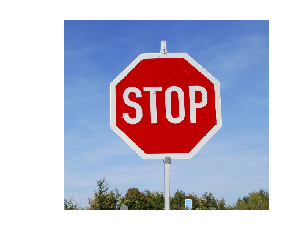

In [20]:

#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

image = mpimg.imread('C:\\Users\\Oishik\\stop_sign.png')
plt.imshow(image);
plt.axis('off');

In [22]:
image.shape

(356, 407, 4)

In [18]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    img = augment_brightness_camera_images(img)
    
    return img

ValueError: not enough values to unpack (expected 3, got 2)

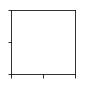

In [57]:
image = np.array(df_train['band_1'][26]).reshape(75,75)

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,20,10,5)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

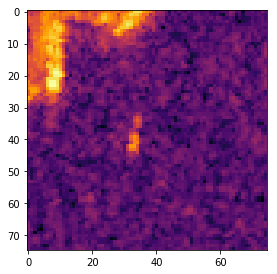

In [50]:
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(3,3,1+1)
arr = np.array(df_train['band_1'][26]).reshape(75,75)
ax.imshow(arr,cmap='inferno')
 
plt.show()

In [51]:
ang_rot = np.random.uniform(40)-40/2
ch=1
rows,cols,ch = (75,75,1)    
Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),10,1)
print(Rot_M)

[[ 0.98480775  0.17364818 -5.9420974 ]
 [-0.17364818  0.98480775  7.08151592]]


In [52]:
img = cv2.warpAffine(arr,Rot_M,(cols,rows))


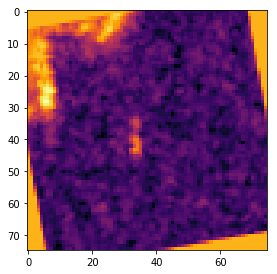

In [53]:
fig = plt.figure(1,figsize=(15,15))
ax = fig.add_subplot(3,3,1+1)
arr = img
ax.imshow(arr,cmap='inferno')
 
plt.show()

In [1]:
import pandas as pd

In [29]:
data=pd.read_csv("C://Users//Oishik//Kaggle//Script/stack_minmax_median.csv")

In [30]:
import pandas as pd
df_train = pd.read_csv("C://Users//Oishik//Kaggle//Script/stack_minmax_median.csv") # this is a dataframe

In [31]:
df_train.columns

Index(['id', 'is_iceberg'], dtype='object')

In [32]:
data=pd.read_csv("C:/Users/Oishik/Kaggle/Script/new_crack_4.csv")

In [33]:
data.count()

id            8424
is_iceberg    8424
dtype: int64

In [34]:
data.is_iceberg=df_train['is_iceberg']

In [35]:
data

,id,is_iceberg
0,5941774d,0.003089
1,4023181e,0.798001
2,b20200e4,0.000210
3,e7f018bb,1.000000
4,4371c8c3,0.000202
5,a8d9b1fd,0.994417
6,29e7727e,0.007892
7,92a51ffb,0.999562
8,c769ac97,0.000000
9,aee0547d,0.000000


In [37]:
data.to_csv('before_final.csv', index=False)